### importing libraries for data analysis

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

### additional libraries for machine Learning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

### importing dataset

In [50]:
os.chdir("D:\Autos")

In [51]:
carsdf=pd.read_csv("cars_dataset.csv")

### inspecting dataset

In [52]:
# view the first 5 rows of the dataset
carsdf.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [53]:
# view the last 5 rows of the dataset
carsdf.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [54]:
#viewing dataset summary
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


### data frame pre-processing

In [55]:
#Checking Null Values
carsdf.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [56]:
#dropping Unnamed column
carsdf = carsdf.drop('Unnamed: 0', axis=1)

In [57]:
#checking duplicates
carsdf.duplicated().sum()

167

In [58]:
#dropping duplicated records
carsdf.drop_duplicates(inplace=True)

In [59]:
#checking unique Values in columns
carsdf.nunique().sort_values(ascending=False)

km_driven            3688
selling_price        1086
mileage               411
max_power             342
car_name              121
model                 120
engine                110
brand                  32
vehicle_age            24
seats                   8
fuel_type               5
seller_type             3
transmission_type       2
dtype: int64

In [60]:
#checking Statistical Summary
carsdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15244.0,6.041131,3.016228,0.0,4.0,6.00,8.0,29.00
km_driven,15244.0,55639.582327,51766.299327,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15244.0,19.697333,4.169307,4.0,17.0,19.67,22.7,33.54
engine,15244.0,1486.171543,520.419390,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15244.0,100.607652,42.915687,38.4,74.0,88.50,117.3,626.00
seats,15244.0,5.326161,0.808760,0.0,5.0,5.00,5.0,9.00
selling_price,15244.0,774701.448111,894676.081921,40000.0,385000.0,559000.00,825000.0,39500000.00


In [14]:
#dropping records where seats is equal to zero
carsdf = carsdf[carsdf['seats'] != 0]

## EDA VISUALS

## Top 10 car models

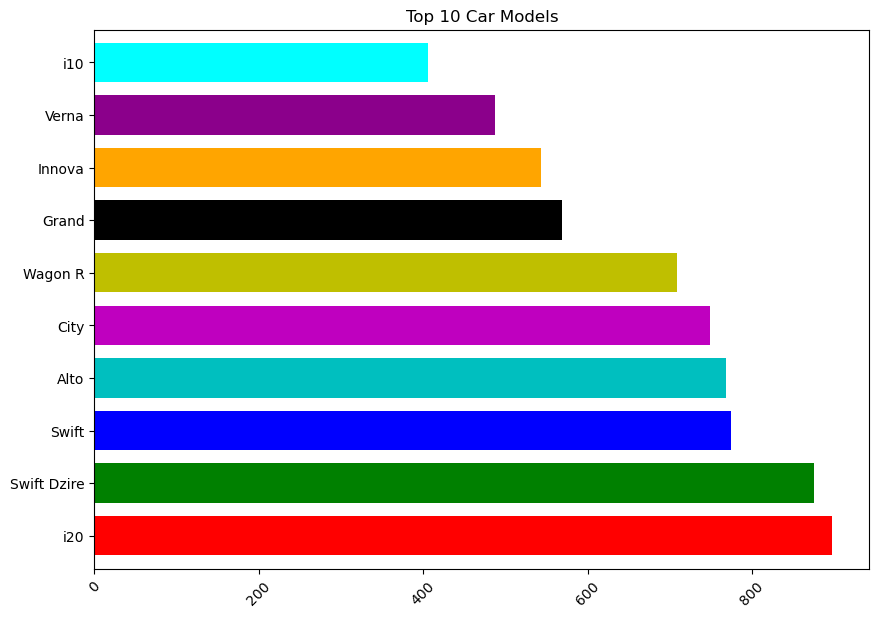

In [34]:
plt.figure(figsize=(10,7))
top_10_models = carsdf['model'].value_counts().head(10)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#FFA500', '#8B008B', '#00FFFF']
top_10_models.plot(kind='barh', color=colors,width=0.75)
plt.title('Top 10 Car Models')
plt.xticks(rotation=45)
plt.show()

### Least 5 models

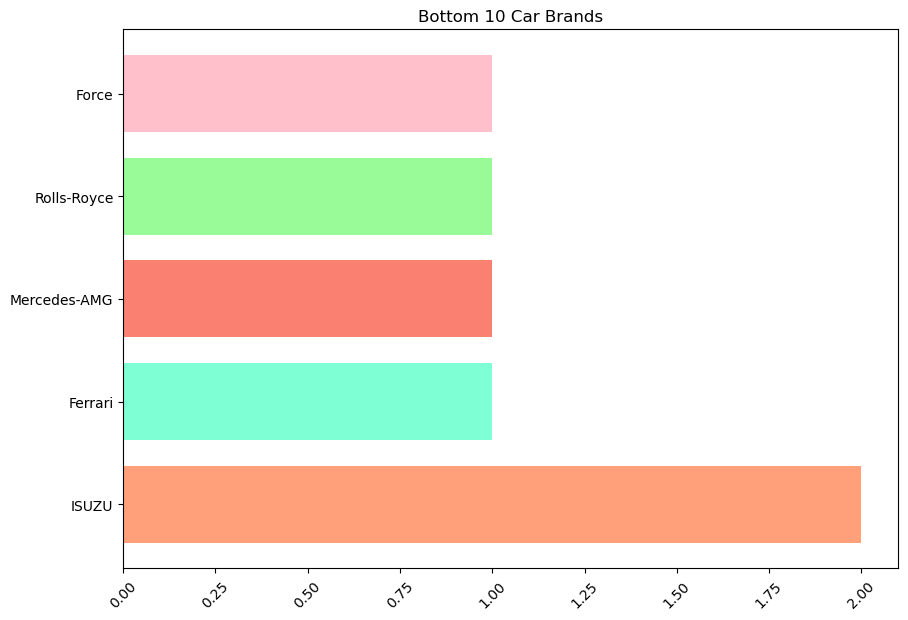

In [63]:
plt.figure(figsize=(10,7))
bottom_10_brands = carsdf['brand'].value_counts().tail(5)
colors = ['#FFA07A', '#7FFFD4', '#FA8072', '#98FB98', '#FFC0CB', '#00CED1', '#F0E68C', '#DDA0DD', '#FFA500', '#FF6347']
bottom_10_brands.plot(kind='barh',width=0.75, color=colors)
plt.title('Bottom 10 Car Brands')
plt.xticks(rotation=45)
plt.show()


## Selling price vs milage

## car age distribution

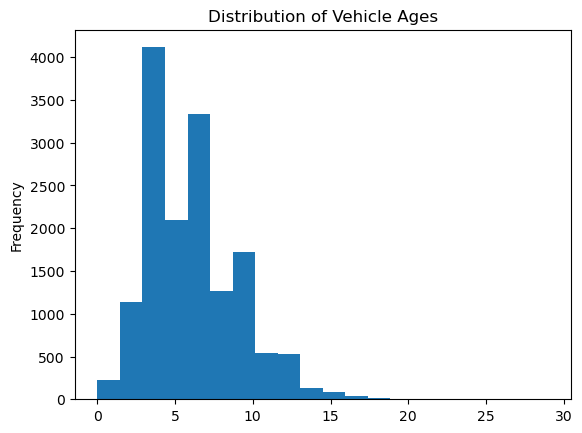

In [44]:
carsdf['vehicle_age'].plot(kind='hist', bins=20)
plt.title('Distribution of Vehicle Ages')
plt.show()

## seller type by car fuel type

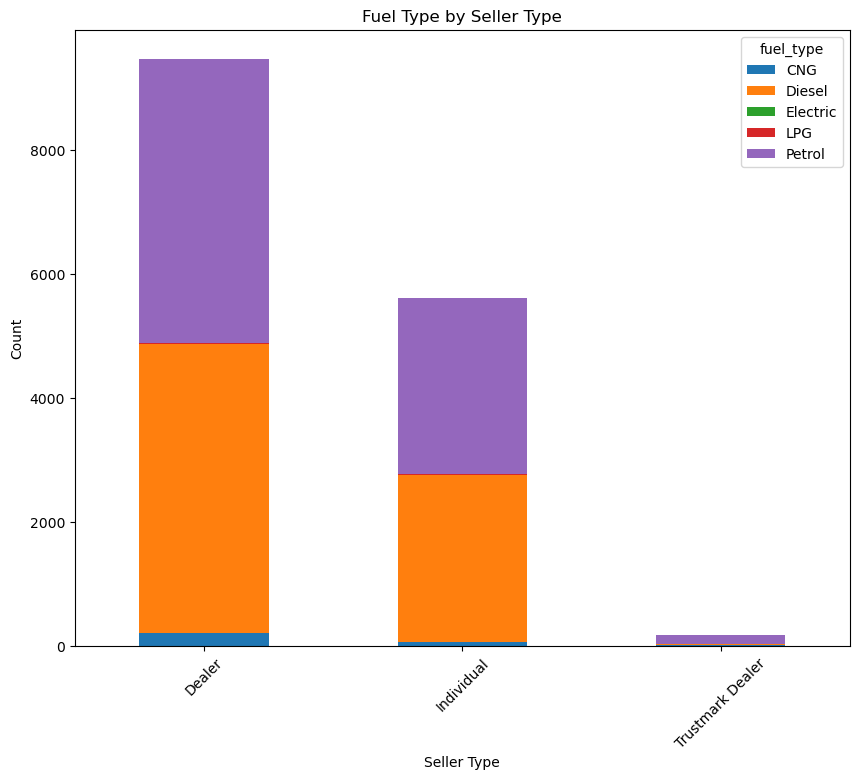

In [62]:
seller_fuel = carsdf.groupby(['seller_type', 'fuel_type']).size().unstack()
seller_fuel.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Fuel Type by Seller Type')
plt.xlabel('Seller Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### Box plot of selling_price by fuel_type

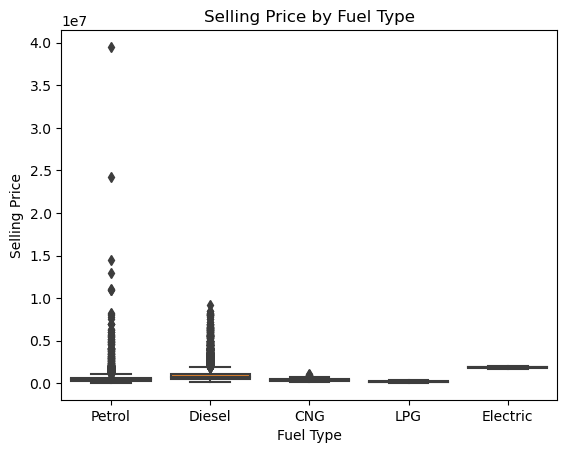

In [66]:
sns.boxplot(x='fuel_type', y='selling_price', data=carsdf)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


### selling_price vs. km_driven with color-coded points for fuel_type:

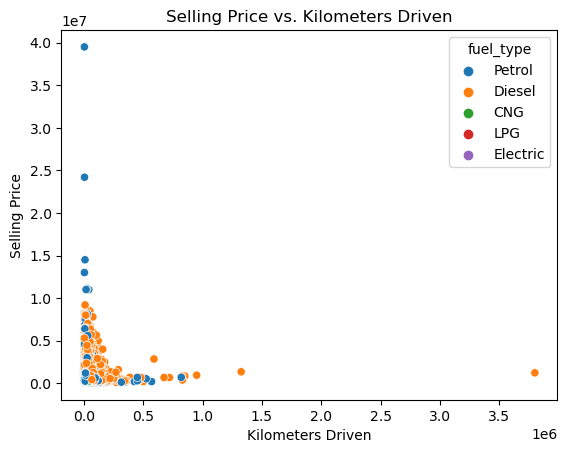

In [67]:

sns.scatterplot(x='km_driven', y='selling_price', hue='fuel_type', data=carsdf)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


### highlighting categorical variables

In [18]:
cat_cols = [ 'seller_type', 'fuel_type', 'transmission_type']
for col in cat_cols:
    print(f'{col}: {carsdf[col].unique()}')

seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
fuel_type: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
transmission_type: ['Manual' 'Automatic']


### Plotting Categorical Variables

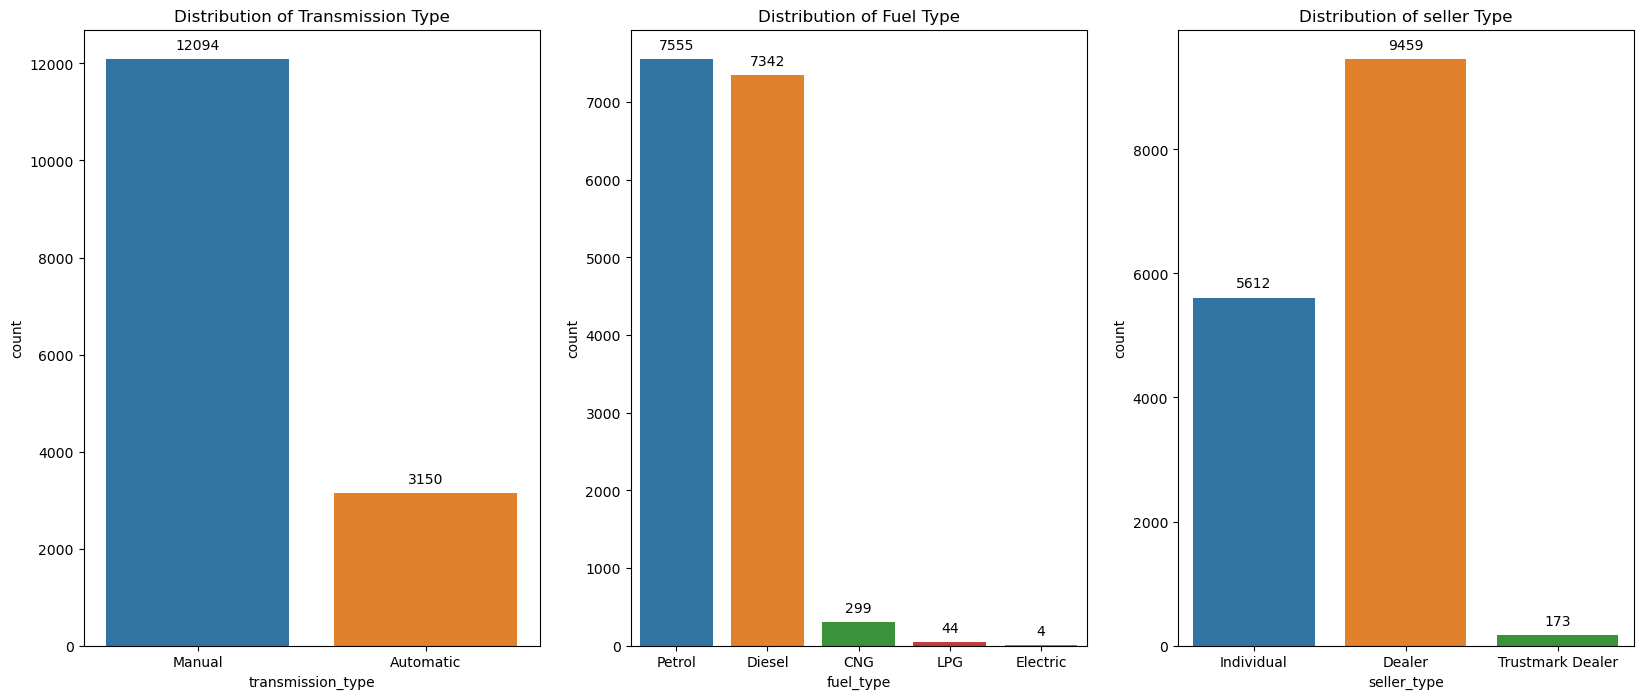

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(x='transmission_type', data=carsdf, ax=axes[0])
sns.countplot(x='fuel_type', data=carsdf, ax=axes[1])
sns.countplot(x='seller_type', data=carsdf, ax=axes[2])
axes[0].set_title('Distribution of Transmission Type')
axes[1].set_title('Distribution of Fuel Type')
axes[2].set_title('Distribution of seller Type')
for ax in axes:
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### creating Machine learning Model

In [74]:
#Checking Data Frame Fields Data types
carsdf.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [81]:
# drop the 'model', 'car-name' and 'brand' columns
carsdf = carsdf.drop(['model','car_name', 'brand'], axis=1)

### Encoding Categorical Variables

In [82]:
# create a LabelEncoder object
le = LabelEncoder()

# encode the seller_type column
carsdf['seller_type'] = le.fit_transform(carsdf['seller_type'])

# encode the fuel_type column
carsdf['fuel_type'] = le.fit_transform(carsdf['fuel_type'])

# encode the transmission_type column
carsdf['transmission_type'] = le.fit_transform(carsdf['transmission_type'])

In [76]:
#viewing encoded data frame
carsdf.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,1,4,1,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,1,4,1,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,0,1,1,22.77,1498,98.59,5,570000


### Splitting data frame

In [83]:
# separate the target variable
y = carsdf['selling_price']

# separate the predictor variables
X = carsdf.drop('selling_price', axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
print(X)

       vehicle_age  km_driven  seller_type  fuel_type  transmission_type  \
0                9     120000            1          4                  1   
1                5      20000            1          4                  1   
2               11      60000            1          4                  1   
3                9      37000            1          4                  1   
4                6      30000            0          1                  1   
...            ...        ...          ...        ...                ...   
15406            9      10723            0          4                  1   
15407            2      18000            0          4                  1   
15408            6      67000            0          1                  1   
15409            5    3800000            0          1                  1   
15410            2      13000            0          4                  0   

       mileage  engine  max_power  seats  
0        19.70     796      46.30      5  
1

In [85]:
print(y)

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15244, dtype: int64


### fitting the algorithim

In [86]:
# instantiate a LinearRegression object
lr = LinearRegression()

# fit the model using the training data
lr.fit(X_train, y_train)

# make predictions using the testing data
y_pred = lr.predict(X_test)

# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.6696353855159298


### plotting the train model

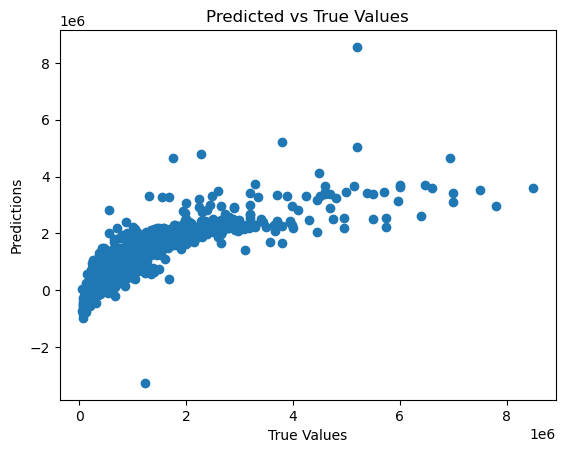

In [87]:
# plot the predicted vs true values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.show()

In [88]:
# make predictions on the test data
y_pred_test = lr.predict(X_test)

# show the predicted prices
print(y_pred_test)


[ 522509.08354733  726866.38994197  669916.81844155 ... 1783938.18762182
  352581.35987866 3428593.9226897 ]


### checking the model performance 

In [89]:
# compute the R-squared score on the test data
r2score_test = r2_score(y_test, y_pred_test)

# print the R-squared score
print("R-squared score (test data):", r2score_test)

R-squared score (test data): 0.6696353855159298


### plotting test model

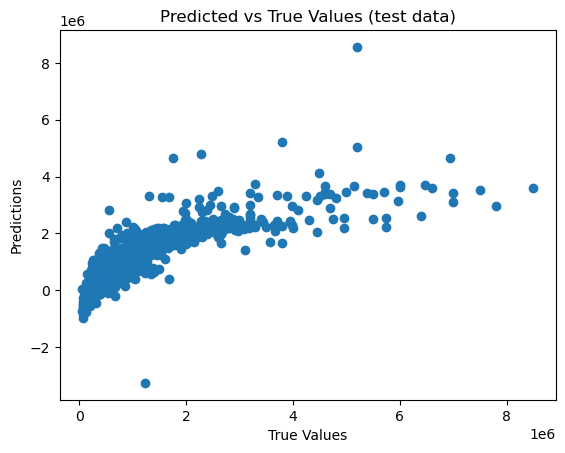

In [90]:
# plot the predicted vs true values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values (test data)')
plt.show()

### using lasso regression algorithim

In [91]:
# create a Lasso Regression object with default hyperparameters
lasso = Lasso()

# fit the Lasso Regression model on the training data
lasso.fit(X_train, y_train)

# make predictions on the test data
y_pred_test = lasso.predict(X_test)

# compute the R-squared score on the test data
r2score_test = r2_score(y_test, y_pred_test)

# print the R-squared score
print("R-squared score (test data):", r2score_test)

R-squared score (test data): 0.6696348951556544


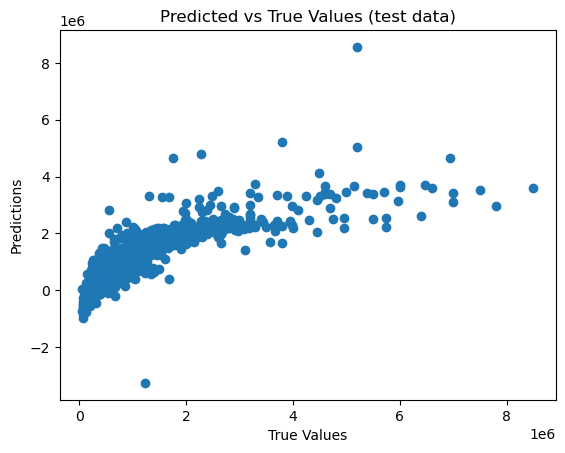

In [92]:
# plot the predicted vs true values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values (test data)')
plt.show()